In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=e2e6817306c3323a6c35ffbdacdf5a6432f402e9bbca8285da0268a8a83660df
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
!git clone https://github.com/pedropro/TACO.git

Cloning into 'TACO'...
remote: Enumerating objects: 492, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 492 (delta 162), reused 134 (delta 77), pack-reused 270
Receiving objects: 100% (492/492), 69.39 MiB | 15.68 MiB/s, done.
Resolving deltas: 100% (313/313), done.


In [3]:
%cd TACO

/content/TACO


In [ ]:
pip install -r requirements.txt

In [ ]:
pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

In [5]:
import sys
sys.path.append("/content/TACO")

In [4]:
!python download.py

Note. If for any reason the connection is broken. Just call me again and I will start where I left.
Traceback (most recent call last):
  File "download.py", line 47, in <module>
    img.save(file_path, exif=img.info["exif"])
  File "/usr/local/lib/python3.7/dist-packages/PIL/Image.py", line 2134, in save
    save_handler(self, fp, filename)
  File "/usr/local/lib/python3.7/dist-packages/PIL/JpegImagePlugin.py", line 763, in _save
    ImageFile._save(im, fp, [("jpeg", (0, 0) + im.size, 0, rawmode)], bufsize)
  File "/usr/local/lib/python3.7/dist-packages/PIL/ImageFile.py", line 528, in _save
    s = e.encode_to_file(fh, bufsize)
KeyboardInterrupt


In [6]:
%matplotlib inline
import json, os
from csv import DictReader
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import cm
from PIL import Image, ImageFilter
from pycocotools.mask import decode as decode_RLE
from copy import copy

In [7]:
img_dir = "/content/TACO/sample_imgs"
json_loc = "/content/TACO/data/annotations.json"

# load json into memory
with open(json_loc) as infile:
	json_data = json.load(infile)

# convert json data to a dictionary of img_path : all_data, for easy lookup
#json_dict = {i['img_path']: i for i in json_data}
json_dict=dict(json_data)

In [ ]:
json_dict

In [8]:
def get_seg_from_entry(entry):
	"""Given a .json entry, returns the binary mask as a numpy array"""

	rle = {
		"size": [entry['height'], entry['width']],
		"counts": entry['segmentation']
	}

	decoded = decode_RLE(rle)
	return decoded

In [25]:
def get_dog(name):
	data = json_dict[name]

	# load img
	img_data = plt.imread(os.path.join(img_dir, data[img_dir+'/'+'file_name']))

	# load seg
	seg_data = get_seg_from_entry(data)

	# add to output
	data['img_data'] = img_data
	data['seg_data'] = seg_data

	return data

In [ ]:
# get list of all available sample files
samples = []
for folder in os.listdir(img_dir):
    for file in os.listdir(os.path.join(img_dir, folder)):
        #print(file)
        samples.append(f"{folder}/{file}")
samples

In [27]:
# select 4 samples
n_samples = 4
selected_samples = np.random.choice(samples, n_samples, replace=False)
selected_samples

array(['batch_2/000025.JPG', 'batch_2/000097.JPG', 'batch_2/000094.JPG',
       'batch_2/000089.JPG'], dtype='<U20')

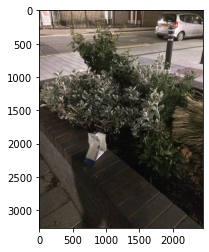

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread('/content/TACO/sample_imgs/batch_5/000050.JPG')
plt.imshow(image)
plt.show()

In [23]:
x=get_dog(img_dir+'/batch_5/000050.JPG')

KeyError: ignored

KeyError: ignored

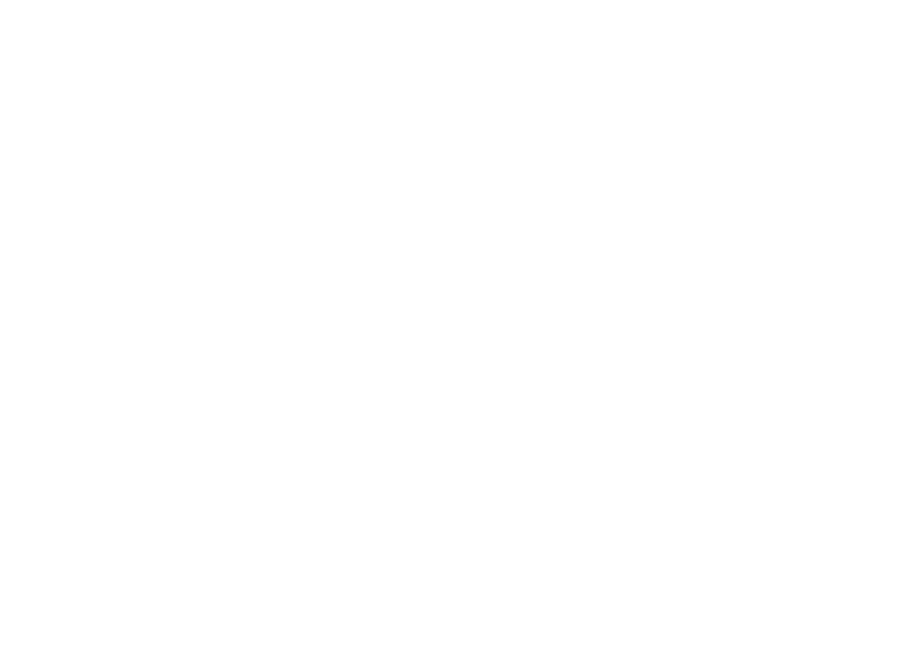

In [29]:
# get list of all available sample files
samples = []
for folder in os.listdir(img_dir):
	for file in os.listdir(os.path.join(img_dir, folder)):
		samples.append(f"{folder}/{file}")

# select 4 samples
n_samples = 4
selected_samples = np.random.choice(samples, n_samples, replace=False)

# Plot three figures:
# image | image with bbox, outline, and keypoints | seg
fig, axes = plt.subplots(nrows = n_samples, ncols=3, figsize=(16,12))
[ax.axis("off") for ax in np.ravel(axes)] # turn off all axes

# colourmap for seg outline
cmap = copy(cm.binary_r)
cmap.set_under('k', alpha=0)

for (ax_orig, ax_all, ax_seg), sample in zip(axes, selected_samples):
	data = get_dog(sample)
	ax_orig.imshow(data['img_data'])
	ax_all.imshow(data['img_data'])

	# add outline of segmentation
	seg_outline = Image.fromarray(data['seg_data'])
	seg_outline = np.asarray(seg_outline.filter(ImageFilter.FIND_EDGES)).copy()
	ax_all.imshow(seg_outline, cmap=cmap, clim=0.1)

	# plot all visible keypoints
	for idx, (x, y, v) in enumerate(data['joints']):
		if v == 1:
		    ax_all.scatter([x], [y], c=[colours[idx]], marker="x", s=50)

	# plot bbox
	x0, y0, width, height = data['img_bbox']
	bbox = Rectangle((x0, y0), width, height, linewidth=2, edgecolor="red", fill=None)
	ax_all.add_patch(bbox)

	# plot pure seg
	ax_seg.imshow(data['seg_data'], cmap="binary")

plt.tight_layout()
plt.show()

In [ ]:
!git clone https://github.com/benjiebob/StanfordExtra.git